### Importing Required Libraries

In [4]:
# Load libraries
import pandas as pd

### Diabetes dataset

In [92]:
# Pima Indians Diabetes Database
# Predict the onset of diabetes based on diagnostic measures
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

# load dataset
pima = pd.read_csv("diabetes.csv")

In [93]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


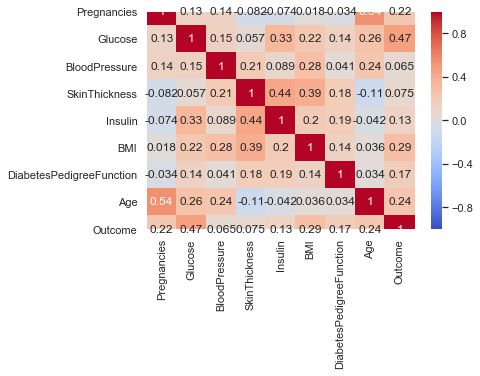

In [97]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = pima.corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

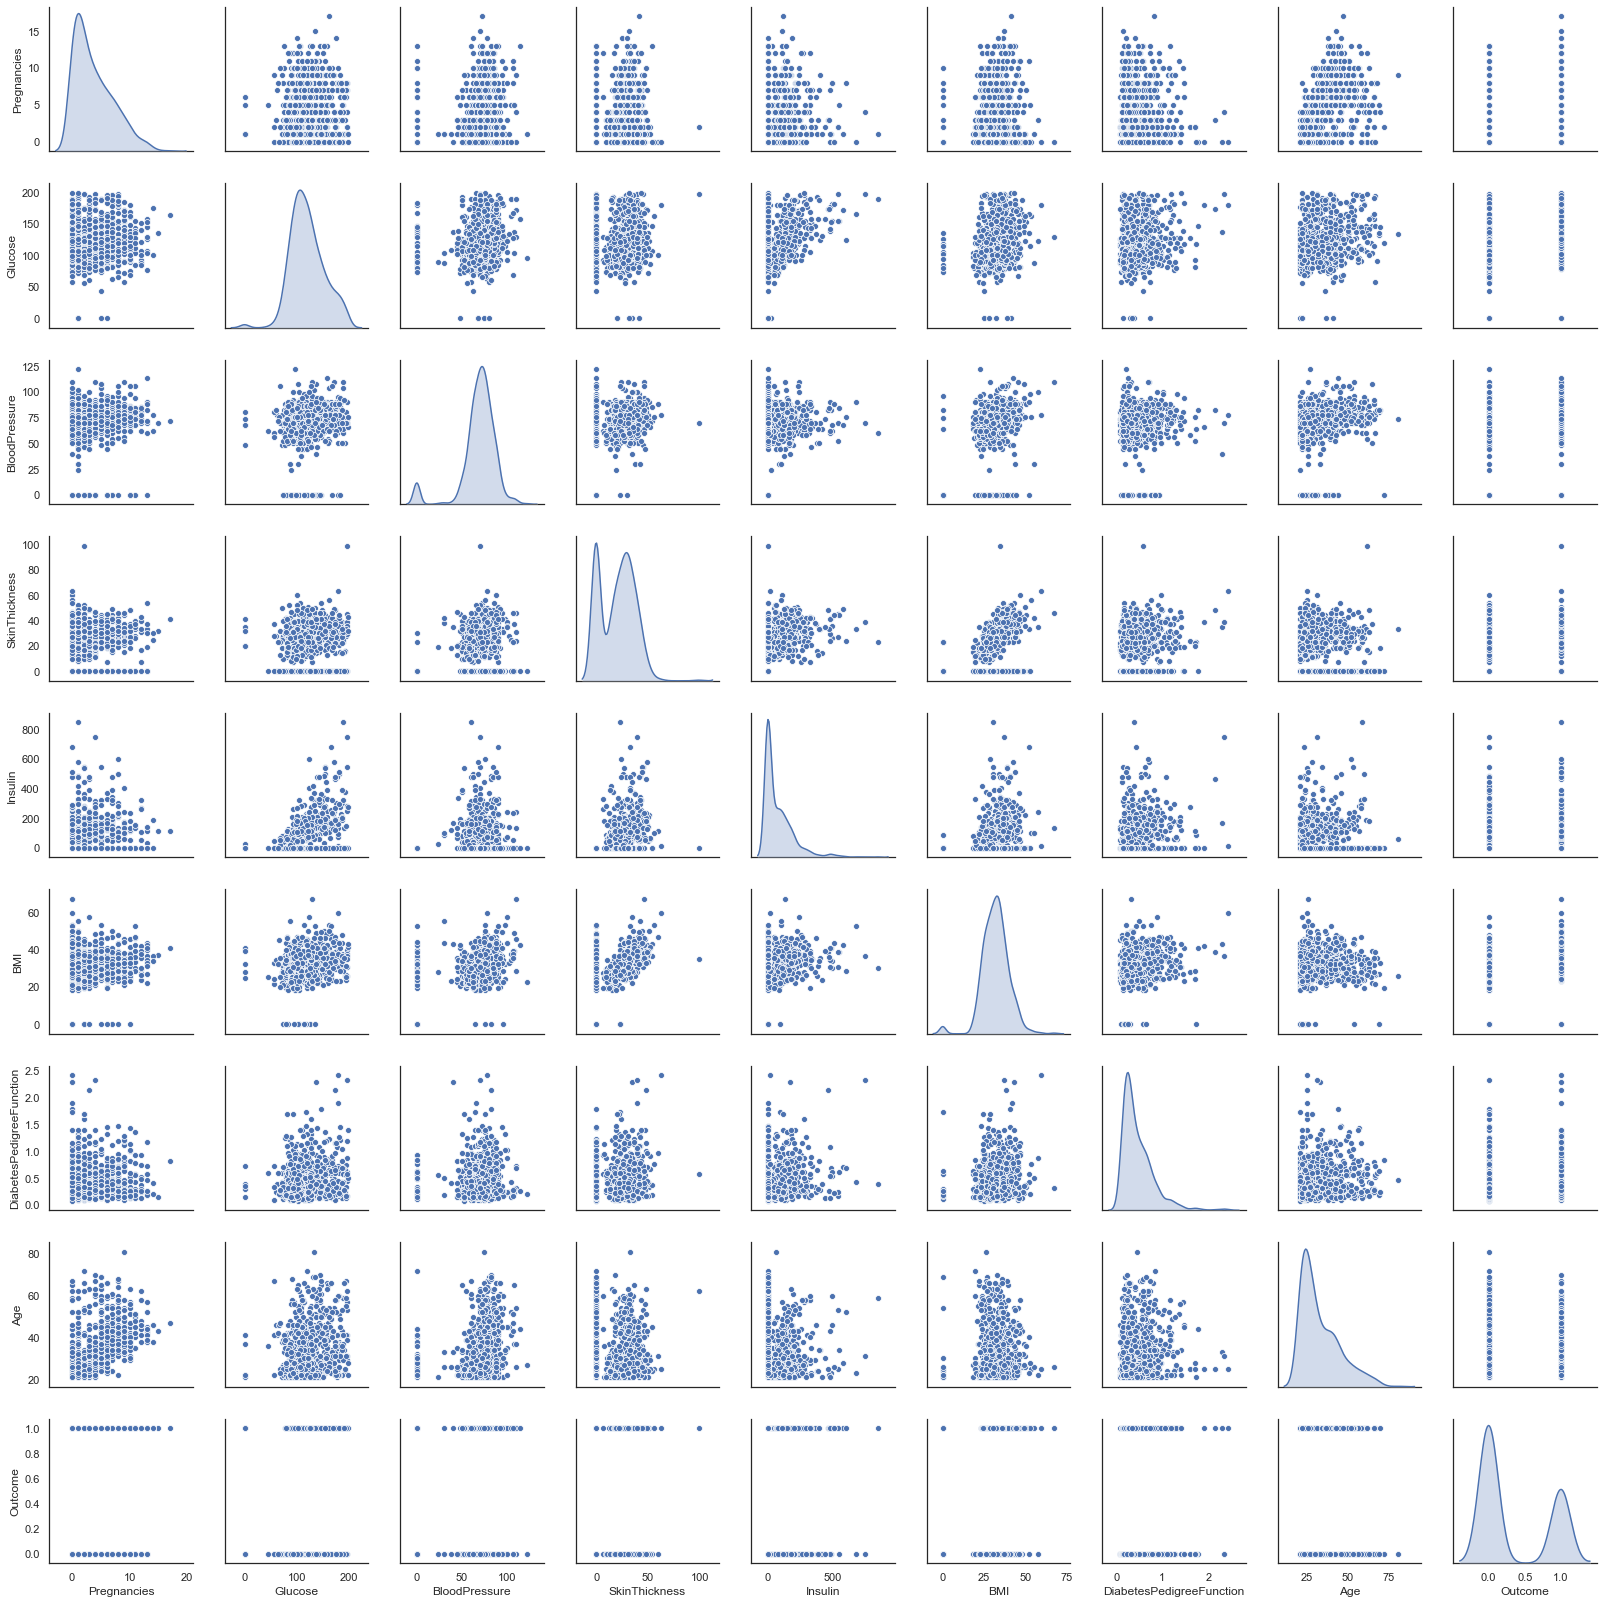

In [89]:
# https://python-graph-gallery.com/111-custom-correlogram/
import seaborn as sns
import matplotlib.pyplot as plt

df = pima
 
# Density
sns.pairplot(df, diag_kind="kde")
 
# Histogram
#sns.pairplot(df, diag_kind="hist")
 
# You can custom it as a density plot or histogram so see the related sections
#sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )



### Feature Selection

In [98]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
#feature_cols = ['Insulin', 'BMI', 'Age', 'SkinThickness']
X = pima[feature_cols] # Features (independent variables)
y = pima.Glucose # Target variable

### Building the Multiple Regression Model

In [99]:
import statsmodels.api as sm
#X = df_adv[['TV', 'Radio']] 
#y = df_adv['Sales']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     32.46
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           1.52e-39
Time:                        09:14:45   Log-Likelihood:                -3649.8
No. Observations:                 768   AIC:                             7316.
Df Residuals:                     760   BIC:                             7353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       66.2412      5.519     12.002      0.000      55.406      77.076
Pregnancies                  0.0589      0.361      0.163      0.870      -0.650       0.768
Insulin                      0.1005      0.010     10.149      0.000       0.081       0.120
BMI                          0.7503      0.144      5.193      0.000       0.467       1.034
Age                          0.6453      0.107      6.058      0.000       0.436       0.854
BloodPressure                0.0700      0.057      1.227      0.220      -0.042       0.182
DiabetesPedigreeFunction     6.3162      3.164      1.996      0.046       0.104      12.528
SkinThickness               -0.3342      0.077     -4.320      0.000      -0.486      -0.182
==============================================================================
Omnibus:                       23.909   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.150
Skew:                           0.121   Prob(JB):                     7.82e-12
Kurtosis:                       4.241   Cond. No.                         829.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Stock market example

In [100]:
#https://datatofish.com/statsmodels-linear-regression/

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

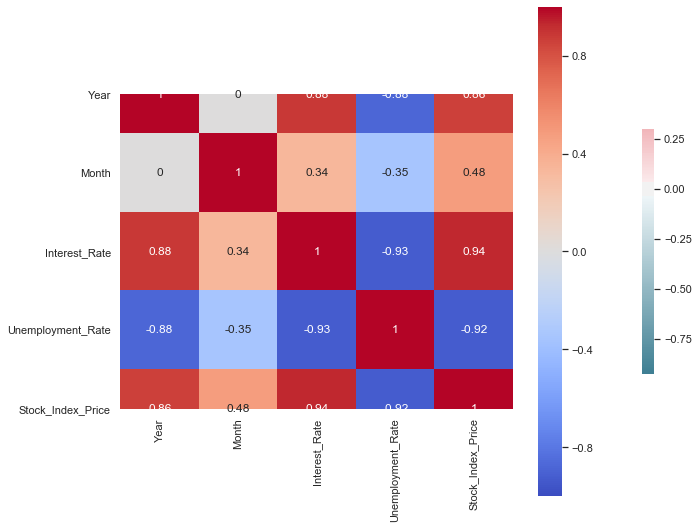

In [101]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

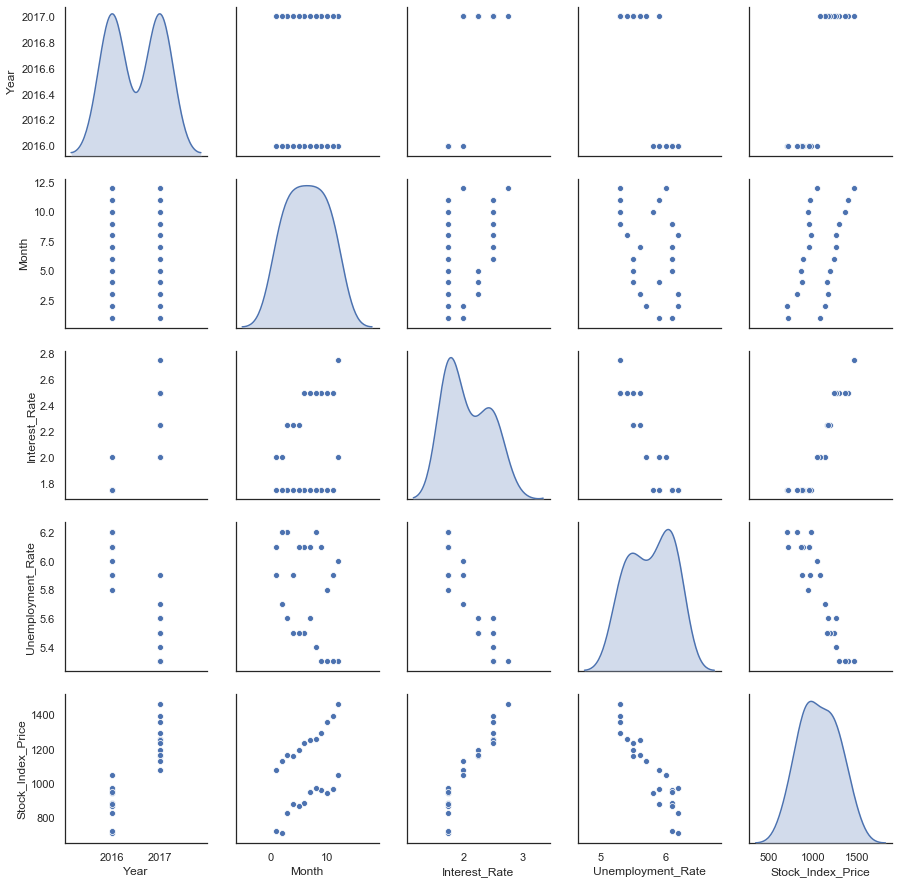

In [102]:
# Density
sns.pairplot(df, diag_kind="kde")

In [104]:
# Here we have 2 variables for the multiple linear regression. 
X = df[['Interest_Rate','Unemployment_Rate']] 
Y = df['Stock_Index_Price']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           4.04e-11
Time:                        09:17:20   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

### Practice

In [103]:
# Compare against models with a single predictor: 

# 1) Interest_Rate

# 2) Unemployment_Rate

### Concrete example

In [5]:
# https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
# load dataset
concrete = pd.read_csv("concrete.csv")
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,Fine Aggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


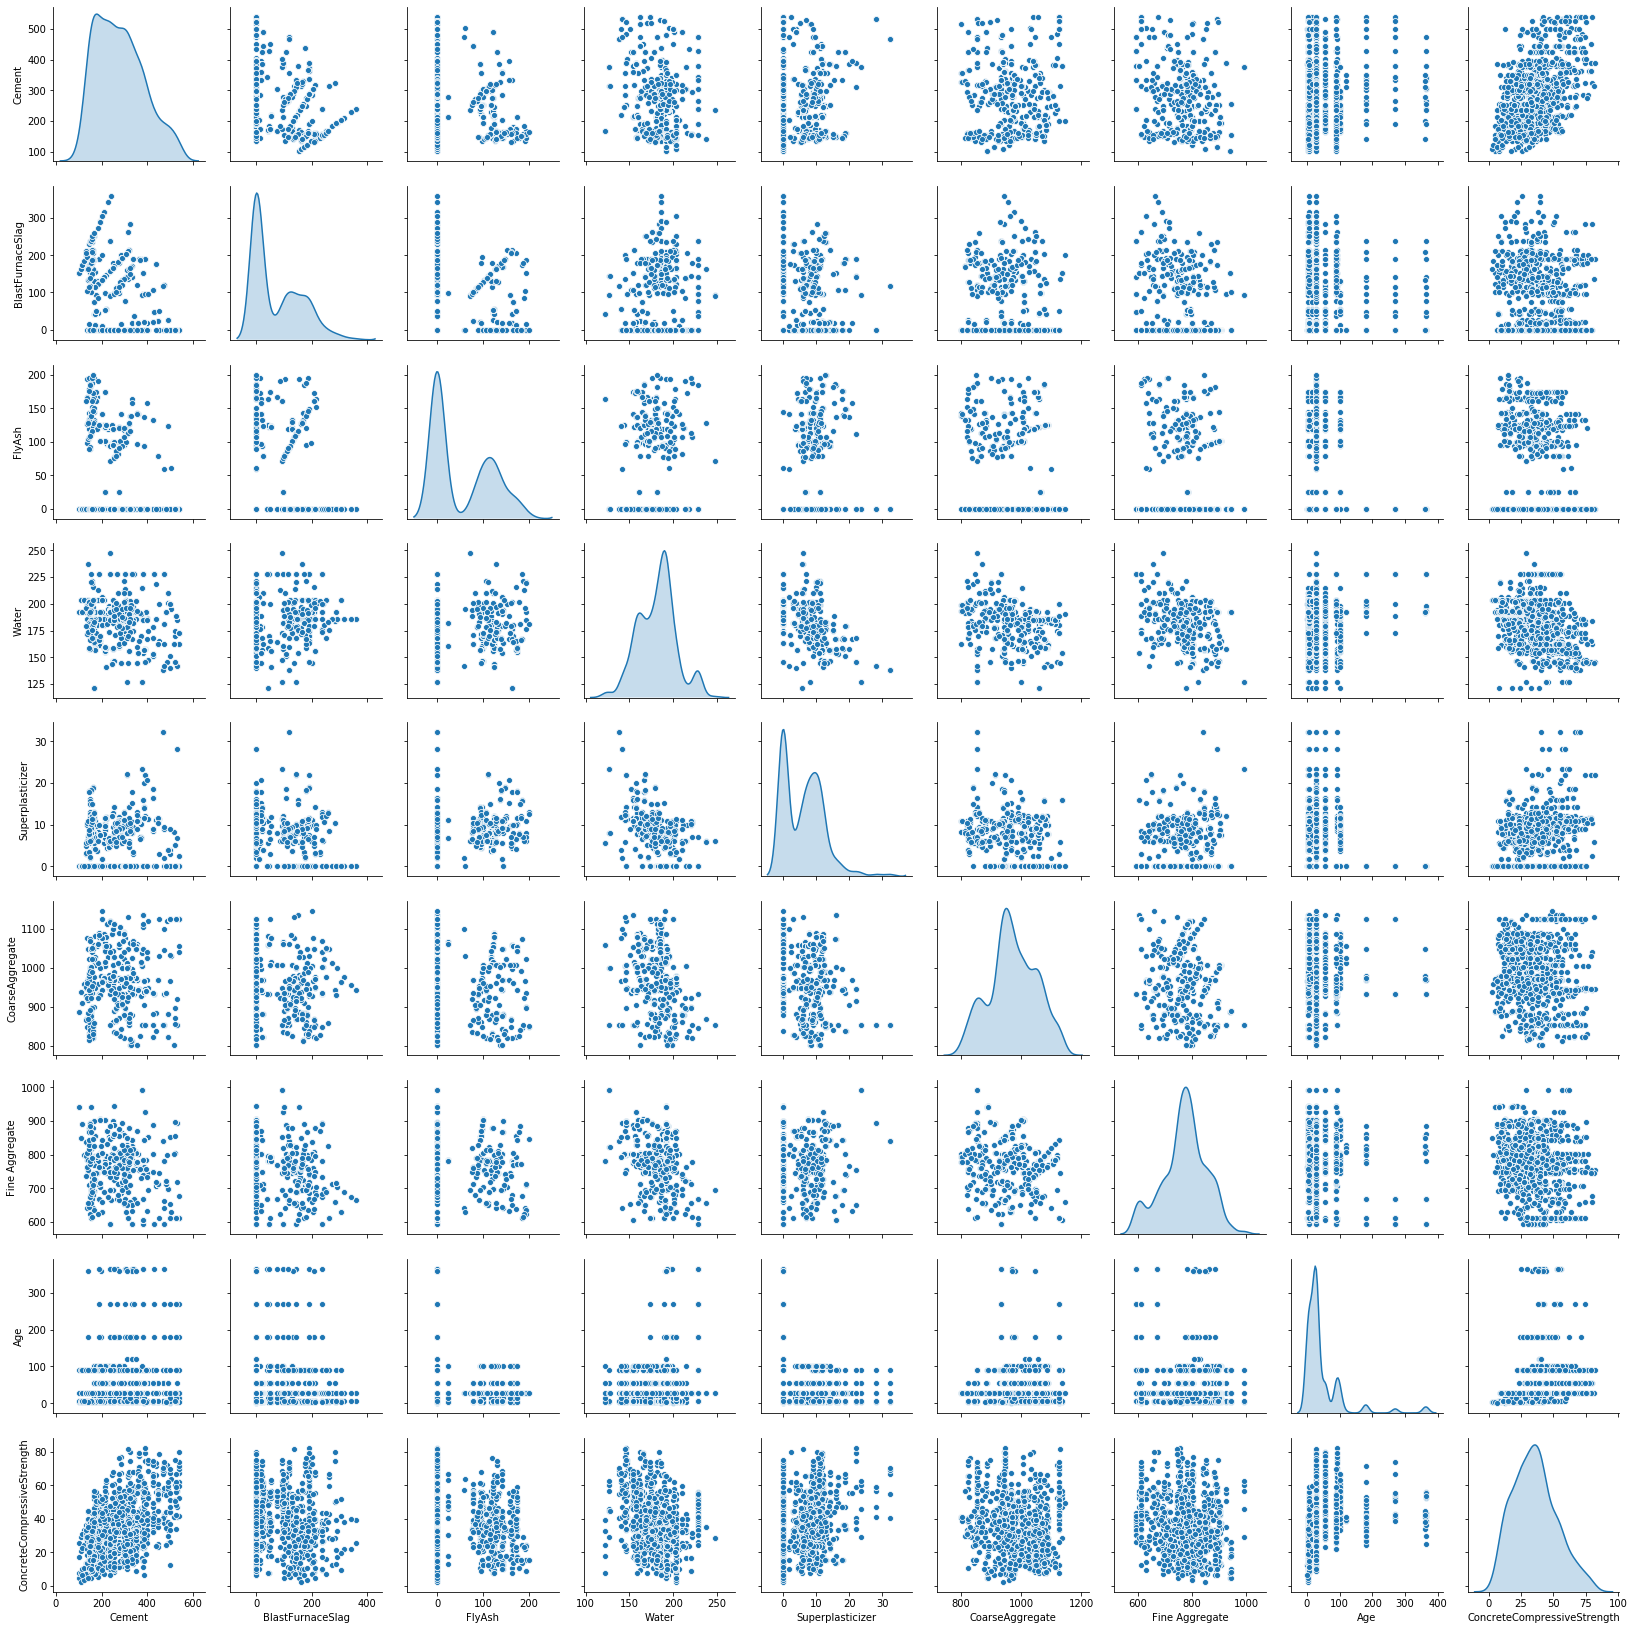

In [7]:
# Density
import seaborn as sns

sns.pairplot(concrete, diag_kind="kde")

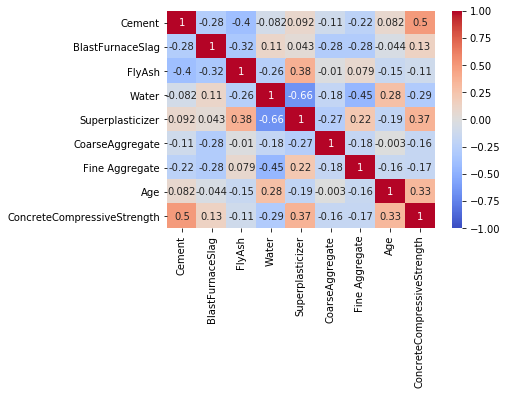

In [8]:
sns.heatmap(concrete.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [10]:
# Build a model for predicting ConcreteCompressiveStrength
import statsmodels.api as sm

X = concrete[['Cement','BlastFurnaceSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','Fine Aggregate','Age']] 
Y = concrete['ConcreteCompressiveStrength']

# Constant is not significant
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.616
Model:                                     OLS   Adj. R-squared:                  0.613
Method:                          Least Squares   F-statistic:                     204.3
Date:                         Tue, 01 Sep 2020   Prob (F-statistic):          6.29e-206
Time:                                 11:06:10   Log-Likelihood:                -3869.0
No. Observations:                         1030   AIC:                             7756.
Df Residuals:                             1021   BIC:                             7800.
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [12]:
# Identify collinearity of every predictor 
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(concrete.columns[:-1])):
    v = vif(np.matrix(concrete[:-1]),i)
    print("VIF for {}: {}".format(concrete.columns[i],round(v,2)))
    
# VIF > 10 indica alta multicolinearidad

VIF for Cement: 26.21
VIF for BlastFurnaceSlag: 4.44
VIF for FlyAsh: 4.56
VIF for Water: 92.58
VIF for Superplasticizer: 5.52
VIF for CoarseAggregate: 85.97
VIF for Fine Aggregate: 73.45
VIF for Age: 2.44


In [18]:
# Keep the intercept and iteratively remove correlated features until reach a valid model. 

X = concrete[['Cement','BlastFurnaceSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','Fine Aggregate','Age']] 
Y = concrete['ConcreteCompressiveStrength']

# Constant is not significant
#X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

#Cond. no. arriba de 20 es preocupante...


                                     OLS Regression Results                                     
Dep. Variable:     ConcreteCompressiveStrength   R-squared (uncentered):                   0.931
Model:                                     OLS   Adj. R-squared (uncentered):              0.931
Method:                          Least Squares   F-statistic:                              1732.
Date:                         Tue, 01 Sep 2020   Prob (F-statistic):                        0.00
Time:                                 11:08:17   Log-Likelihood:                         -3869.4
No. Observations:                         1030   AIC:                                      7755.
Df Residuals:                             1022   BIC:                                      7794.
Df Model:                                    8                                                  
Covariance Type:                     nonrobust                                                  
                       coef   